# <font color='black'>Introduction aux systèmes radar</font>

---

<img src="images/logo.png" width="100" align="right">


> Year: **2022**
>
> Version: **1.0**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <font color='black'>Introduction</font>

---

Un RADAR (RAdio Detection And Ranging) est un système de détection électromagnétique (EM) et de mesure de distance. Son principe est analogue aux systèmes d'écholocation qu'utilisent certains animaux évoluant en milieu obscurs (chauve-souris, cétacés). La différence principale est que l'on utilise une onde EM et non sonore.

Le radar émet donc une impulsion EM de forte puissance. Celle-ci se propage jusqu'à rencontrer un éventuel obstacle. Il réfléchit l'onde dont une partie est recueillie sur l'antenne du radar. La mesure du temps de vol entre l'onde émise et l'onde reçue permet d'estimer la distance de la cible.

<img src="images/rad_fig1.png" width="500">


Ce système est donc actif, ce qui lui procure des avantages par rapport aux systèmes de détection et de mesures passifs (optiques, par exemple) nécessitant une source extérieure au système (soleil, par exemple). De plus, en fonction de la bande du spectre EM choisie pour émettre, le système sera capable de «voir» à travers certains milieux opaques à la lumière visible (nuages, brouillard) et même pénétrer la matière sur une certaine profondeur (détection de mines enfouies, ...). Enfin, comme on maitrise l’onde émise, on a directement accès à des mesures précises de distances, contrairement aux systèmes passifs.


Le champ d’application de tels systèmes est donc très vaste. Historiquement, les applications sont militaires (veille contre les attaques aériennes, détections de navires, autodirecteurs de missiles, cartographie de terrains, ...). Dans le monde civil, on peut citer la navigation aérienne et maritime, la météorologie, l’altimétrie, les systèmes de freinage d’urgence pour véhicules automobiles, ...).

## Emission d’une impulsion unique, cible fixe

Nous allons tout d’abord nous placer dans le cas le plus simple d’objets à détecter immobiles.

### Modélisation des signaux émis et reçus


Dans un premier temps, le signal émis, $e(t)$, sera une simple impulsion de durée $T = 1$ ms, modulée par une fréquence porteuse constante $f_0 = 40$ KHz, comme représenté sur la figure ci-dessous:

<img src="images/rad_fig2.png" width="500">


Le signal reçu sur l’un des récepteurs, $r(t)$, sera une réplique de $e(t)$ atténuée et décalée dans le temps d’une valeur $\tau_0$.

#### Question 1

Donner l’expression de $\tau_0$ en fonction de la distance $d$ entre la cible et le radar et $c$ la célérité des ondes.

---


D'après les définitions de l'énoncé, on a :
 $$\tau_0 = d / c$$
 , le temps mis par l'onde pour parvenir à l'obstacle.
 

Les signaux réels, émis et reçus sont tout d’abord convertis en leurs signaux analytiques correspondants.

>##### Signal analytique, transformée de Hilbert 
>La transformée de Fourier $X(f)$ d’un signal réel $x(t)$ est à symétrie hermitienne (module pair et phase impaire). L'observation de la transformée de Fourier seulement sur les fréquences positives suffit donc à reconstruire le signal sans perte d'information. 
>
>On peut ainsi définir le signal analytique associé par 
>
> $$X_a(f) = 2 U(f) X(f)$$
>
>où $U(f)$ est l’échelon unité. Celui-ci est un signal complexe $x_a(t) = x(t) + i \hat x(t)$ dont la partie réelle est le signal d’origine $x(t)$. Dans le cas des signaux à bande étroite (dont l’excursion fréquentielle est faible autour d’une fréquence centrale), la partie imaginaire, appelée Transformée de Hilbert correspond à la composante en quadrature par rapport à $x(t)$ (déphasée de $\pi/2$)



#### Question 2

Vérifier que $\Re[x_a(t)] = x(t)$ en calculant $\mathcal F [\Re[x_a(t)]]$.
De même, donner la fonction de transfert fréquentielle correspondant à la transformée de Hilbert en calculant $\mathcal F [\Im[x_a(t)]]$ . En déduire que la transformée de Hilbert correspond à un filtre déphaseur pur de $\cfrac{\pi}{2}$.
Calculer la transformée de Fourier du signal émis, $e(t)$. En déduire l’expression du signal analytique associé, $e_a(t)$.

---

Nous allons tout d'abord montrer un résultat intérmédiaire, à savoir que :
Les parties réelle et imaginaire de la transformée de Fourier d'un signal sont respectivement les transformées de Fourier des parties paires et impaires du signal.
Preuve:
Soit $x(t)$ un signal. Soit $x_p$ sa partie paire et $x_i$ sa partie impaire.
On va montrer que $\mathcal F (x_p)$ est une fonction réelle.
$$\mathcal F (x_p) = \int_{-\infty}^{+\infty} x_p(t) e^{iwt} dt $$
$$= \int_{-\infty}^{0} x_p(t) e^{iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par relation de Chasles
$$= \int_{0}^{+\infty} x_p(-t) e^{-iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par changement de variable
$$ = \int_{0}^{+\infty} x_p(t) e^{-iwt} dt + \int_{0}^{+\infty} x_p(t) e^{iwt} dt$$ 
par parité de $x_p$
$$ = \int_{0}^{+\infty} x_p(t) (e^{-iwt}  + e^{iwt}) dt$$ 
par linéarité 
$$ = \int_{0}^{+\infty} 2 x_p(t) e^{-iwt} cos(wt)  dt$$ 
par propriété des exponentielles complexes
Ce résultat est donc une fonction réelle, car l'intégrale d'une fonction réelle est un réel.
On montre de même que  $\mathcal F (x_i)$ est une fonction imaginaire pure. 
Comme tout signal peut se décomposer en la somme de sa partie paire et impaire.
On a : Par linéarité de la transformée de Fourier.
$\mathcal F (x)$ = $\mathcal F (x_p)$ + $\mathcal F (x_i)$
et donc d'après ce qui précède:
$\Re (\mathcal F (x)) = \mathcal F (x_p)$ et $\Im (\mathcal F (x)) = \mathcal F (x_i)$ 

Ce résultat prouvé, nous allons montrer que $\Re[x_a(t)] = x(t)$
On a d'après l'énoncé:
$$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
Par linéarité de la transformée de Fourier:
$$ = \mathcal F (\Re (x_a))  + i \mathcal F (\Im (x_a))$$






Nous allons tout d'abord montrer un résultat intermédiaire,  à savoir que :
Si un signal $x(t)$ est réel, alors la partie réelle de sa TF est la partie paire de sa TF et la partie imaginaire de sa TF est sa partie impaire.
Preuve:
Soit $x(t)$ un signal réel:
$$ \mathcal F (x)(w) =  \int_{-\infty}^{+\infty} x(t) e^{iwt} dt $$
Comme x est réel
$$ = c$$
Comme le produit des conjugués est égal au conjugué des produits
$$ = \int_{-\infty}^{+\infty} (x_p(t) e^{-iwt})* dt$$
Comme le conjugué de l'intégrale est l'intégrale des conjugués
$$ = \int_{-\infty}^{+\infty} (x_p(t) e^{-iwt}) dt *$$
$$ = \mathcal F (x)*(-w)$$
Donc, en passant aux parties réelles et imaginaires:
$$\Re \mathcal F(x)(w) = \Re \mathcal F (x)(-w)$$
et $$\Im \mathcal F(x)(w) =- \Im \mathcal F (x)(-w)$$
La partie réelle de la TF de x est donc paire, et la partie imaginaire est impaire.
Ainsi, comme il existe une unique paire de fonction X_p, X_i respectivement paire et impaire telle que 
$\mathcal F(x) = X_p + X_i$, et que par propriété de la partie réelle et imaginaire, on a:
$\mathcal F(x) = \Re \mathcal F(x) + i \Im \mathcal F(x)$, on a par identification, 
$$\Re \mathcal F(x) = X_p$$
$$ \Im \mathcal F(x) = X_i$$

Montrons maintenant le résultat demandé.
D'après l'énoncé, $$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
La partie paire de $$X_a(f)$$ est donc $X(f)$, par définition de la fonction échelon unité. Nous la noterons $X_{a,p}$, et $X_a,i$ pour la partie impaire.

Comme le signal $\Re (x_a)$ est réel, on a.
$\mathcal F(\Re x_a) = 



### Réponse à la question 2
Tout d'abord, nous allons montrer le résultat suivant, pour tout signal $x(t)$
$$ \mathcal F(\Re (x)) = \frac {\mathcal F(x) + \mathcal F(-x)*}{2}$$
$$ \mathcal F(\Im (x)) = \frac {\mathcal F(x) - \mathcal F(-x)*}{2}$$
Ainsi, en apppliquant ce résultat à $x_a$, on a:
$$ \mathcal F(\Re (x_a)) = \frac {\mathcal F(x_a) + \mathcal F(-x_a)*}{2}$$
Or, d'après l'énoncé, $$X_a(f) = 2 U(f) X(f) = \mathcal F (x_a)$$
De plus, comme $x(t)$ est réel, on a la relation suivante, démontrée plus haut: $$X(f) = X(-f)*$$
Donc, $$\frac {\mathcal F(x_a) + \mathcal F(-x_a)*}{2} = X$$
Ainsi, par bijectivité de la tranformée de Fourier, on a bien:
$$\Re(x_a)(t) = x(t)$$
On en déduit, comme $x_a(t) = x(t) + i \hat x(t)$, que $ \Im (x_a)(t) = \hat x(t)$
Ainsi, en utilisant la deuxième égalité plus haut:
$$ \mathcal F(\Im (x_a)) = \frac {\mathcal F(x_a) - \mathcal F(-x_a)*}{2}$$
De même que précédemment, comme $X(f) = X(-f)*$ et  $X_a(f) = 2 U(f) X(f)$, on a :
$$ \mathcal F(\Im (x_a))(f) = sgn(f)X(f)$$
Ainsi, $$ \mathcal F(\hat x)(f) = sgn(f)X(f)$$
Donc, on peut voir la transformée de Hilbert comme un filtre dont la fonction de transfert serait telle que:
$$\forall w, H_H(jw)* jw = w sgn(w)$$
Et donc:
$$H_H(jw) = -jsgn(w)$$

En appliquant ce filtre à un cosinus, on a, avec $w>0$ sans perdre de généralité:
$$ \hat {\frac{e^{jwt} + e^{-jwt}}{2}} = \mathcal F^{-1}((H_H)(jwt) + (H_H)(-jwt))$$
$$ = ...$$
$$=\frac{e^{jwt} + e^{-jwt}}{2}$$
On transforme donc un cosinus en un sinus. Ce filtre est donc bien un quadrateur!






### Calcul de la transformée de Fourier de x(t):
D'après l'énoncé:
$$e(t) = 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t)$$
Donc $$F(e(t))(w) = \int_{-\infty}^{+\infty} 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t) e^{-iwt} dt$$
$$= \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} sin(2\pi f_0 t) e^{-iwt} dt$$
Avec $w_0 = 2\pi f_0$:
$$=  \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} sin(w_0 t) cos(wt) - i sin(w_0 t) sin(wt)  dt$$
D'après les formules de Simpson:
$$= \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} \frac {sin((w_0+w)t) + sin((w_0 - w)t)}{2} + i \int_{-\frac {T_0}{2}}^{\frac {T_0}{2}} \frac {cos((w_0+w)t) - cos((w_0 - w)t)}{2}$$
$$ = \frac {1}{2} [\frac {-cos((w_0+w)t)}{w_0 + w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}} +  [\frac {-cos((w_0-w)t)}{w_0- w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}}+ i([\frac {sin((w_0+w)t)}{w_0 + w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}} +  [\frac {sin((w_-+w)t)}{w_0 - w}]_{-\frac {T_0}{2}}^{\frac {T_0}{2}})$$
Par parité de cos et imparité de sin:
$$ =i \frac {sin(\frac {(w_0 +w)T_0}{2})}{w_0 + w} + \frac {sin( \frac {(w_0 - w)T_0}{2})}{w_0 - w}$$
Nous allons à présent tracer le module cette foncton:

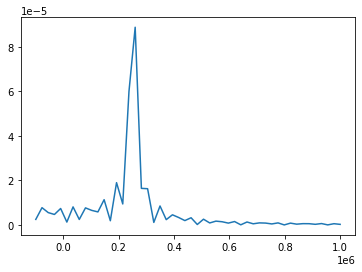

In [2]:
#tracé de la fonction avec les valeurs de l'énoncé
w0 = 2*np.pi*40000
tab_w = np.linspace(-100000,1000000)
tab_f =abs( np.sin((tab_w + w0)*0.0005)/(w0 + tab_w) +  np.sin((tab_w - w0)*0.0005)/(w0 - tab_w))
plt.plot(tab_w, tab_f)


On observe donc bien une fonction dont l'excursion est faible autour de la fréquence centrale $w_0$!
On va donc pouvoir utiliser le fait que la transformée de Hilbert s'approxime par un simple déphasage de $\frac {\pi}{2}$
D'où: $$ \hat x(t) =  1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}cos(2\pi f_0 t)$$

Ainsi, le signal analytique s'écrit:
$$x_a(t) =  1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}sin(2\pi f_0 t) + i 1_{[-\frac {T_0}{2}, \frac {T_0}{2}]}cos(2\pi f_0 t) $$



# Autre manière de calculer l'intégrale donne : 

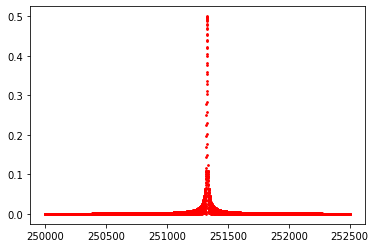

In [3]:
#tracé de la fonction avec les valeurs de l'énoncé
w0 = 2*np.pi*40000
tab_w = np.linspace(250000,252500,10000)
tab_f =abs(-(1/2)*(np.sin((w0 - tab_w)/2)/((w0 - tab_w)/2) -  np.sin((w0 + tab_w)/2)/((w0 + tab_w)/2)))
plt.scatter(tab_w, tab_f, s = 3, c='r')
plt.show()

L’intérêt de convertir les signaux réels en leurs équivalents complexes réside dans le fait que tout déphasage sera vu comme une simple multiplication par un nombre complexe. Il est ainsi plus facile d’extraire et de traiter la phase de 
$x_a(t) = \alpha e^{i \varphi} e^{2 i \pi f_0 t}$ que de $x(t) = \alpha \cos (2 i \pi f_0 t + \varphi)$

### Numérisation des signaux

Ces signaux complexes sont ensuite échantillonnés à une fréquence $f_s = 9.5$ KHz (environ), ne respectant pas le théorème de Shannon. Cela permet de démoduler (diminution de la fréquence porteuse) les signaux et de réduire la taille des vecteurs à traiter. 

> #####  Théorème de Shannon – Repliement de spectre (aliasing)
>
>Le fait d’échantillonner un signal continu à une cadence $f_s$ entraine une périodisation de sa transformée de Fourier à la période $f_s$ Ainsi, si l’on veut retrouver, sans ambiguïté le signal continu d’origine, il faut échantillonner à une cadence strictement supérieure à 2 fois la fréquence maximale contenue dans le signal d’origine.
>
>Si cette condition de Shannon n’est pas respectée, une partie de l’information sera perdue et le signal sera modifié. Dans le cas d’un signal à bande étroite, si l’on choisit une fréquence d’échantillonnage supérieure à la bande mais inférieure à la fréquence porteuse, le repliement de spectre engendré modifie seulement la fréquence porteuse apparente et est assimilable à une démodulation.

#### Question 3
Quelle sera la fréquence apparente des signaux échantillonnés ?

---

### Question 3:
Fréquence des signaux échantillonés:
D'après la formule de poisson, avec $w_e$ la pulsation d'échantillonage:
$$\Delta t \hat x_d(t)(w) = \sum_n \mathcal F(x)(w - nw_e)$$ 
Cela prouve la périodicité en $w_e$ du spectre su signal échantilloné.
Or, on a vu que le maximum de $\mathcal F(x)$ est atteint en $w = w_0$, et que le signal est assimilable à une seule bande non nulle à cette fréquence.
Ainsi, $\Delta t \hat x_d(t)(w)$ sera "nul" partour sauf pour les w tels que :
$$w = w_0 + nw_e$$ 
La fréquence apparente du signal sera donc la plus faible de cette fréquence (vérifiant tout de même w>=0 car on s'est placé sur \R+), c'est à dire, comme $w_ > w_e$: $$w_{app} = w_0 - w_e$$



### Estimation de la distance


Nous avons vu dans la partie précédente, que le but premier d’un radar était de détecter et d’estimer la distance des objets environnants. Pour cela, la méthode optimale est d’effectuer l’intercorrélation entre le signal reçu et le signal émis.

> ##### Autocorrélation - Intercorrélation
>
> On sait que l’énergie se conserve par transformée de Fourier (théorème de Parseval) :
>
> $$ \int_{-\infty}^{+\infty} |x(t)|^2 dt = \int_{-\infty}^{+\infty} |X(f)|^2 df $$
>
> On peut ainsi définir une densité spectrale d’énergie :  $\Phi_x (f) = |X(f)|^2$.
>
>
> Par transformée de Fourier inverse, on a :
> $$ \mathcal F^{-1} [|X(f)|^2] = x(t) * x^*(-t) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
>C’est la fonction d’autocorrélation, notée :
> $$ R_x(\tau) = \int_{-\infty}^{+\infty}  x(t)\, x^*(t-\tau) dt $$
>
> Elle mesure la ressemblance d’un signal $x(t)$ avec sa réplique décalée en temps. Cette fonction est à symétrie hermitienne et maximale en 0. 
>
> On peut généraliser cette fonction à l’intercorrélation entre 2 signaux :
> $$ R_{xy}(\tau) = \int_{-\infty}^{+\infty}  x(t)\, y^*(t-\tau) dt = x(t) * y^*(-t) = \mathcal F^{-1} [X(f)Y^*(f)] $$
>
>Pour les signaux discrétisés en temps, on utilise la formulation suivante :
> $$ R_{xy}[k] = \sum_{n = -\infty}^{+\infty} x[n] y^*[n-k] $$

> ##### Algorithme de FFT
> L’algorithme dit de Fast Fourier Transform (FFT) dû à Cooley et Tukey (1965) consiste à scinder la transformée de Fourier du vecteur initial de taille N en transformées de Fourier de taille N/2. On peut ainsi se ramener successivement à des transformées de Fourier élémentaires de taille 2 permettant de passer d’une charge calculatoire en $O(N^2)$ avec l’algorithme « naïf » (produit matriciel) à une charge calculatoire en $O(Nlog_2(N))$.

#### Question 4
En supposant que $r_a(t) = \alpha e_a(t - \tau_0)$ où $\alpha$ est un nombre complexe inconnu, exprimer l’intercorrélation $R_{r_a e_a}(\tau)$ en fonction de l’autocorrélation de $e_a(t)$. Calculer et tracer la fonction d’autocorrélation de $e_a(t)$ .

---

#### Réponse 4  

On a : 
$$
\begin{align}
R_{e_ar_a}(\tau) & =  \int_{-\infty}^{+\infty} \alpha e_a(t-\tau_0)e_a^*(t-\tau)dt \\
\newline
R_{e_ar_a}(\tau) & = \alpha \int_{-\infty}^{+\infty} e_a(t) e_a^*(t - (\tau - \tau_0))dt \\
\newline
R_{e_ar_a}(\tau) & = \alpha R_{e_a}(\tau - \tau_0) 
\end{align} 
$$

Or, dans le cas générale, on a : 
$$
\begin{align}
R_{xy}(\tau) & =  \int_{-\infty}^{+\infty} x(t)y^*(t-\tau)dt \\
\newline 
&= \int_{-\infty}^{+\infty} x(t+\tau)y^*(t)dt \\
\newline
R_{xy}(-\tau)^* & =  \int_{-\infty}^{+\infty} y(t)x^*(t-\tau)dt = R_{yx}(\tau)
\end{align}
$$

Soit en l'appliquant à l'égalité précédente :

$$
\begin{align}
R_{r_ae_a}(\tau) &= R_{e_ar_a}(-\tau)^* \\
\newline
R_{r_ae_a}(\tau)&= \alpha^*R_{e_a}^*(-\tau - \tau_0)
\end{align}
$$


$$x_a(t) =  1_{[-\frac {1}{2}, \frac {1}{2}]}sin(2\pi f_0 t) + i 1_{[-\frac {1}{2}, \frac {1}{2}]}cos(2\pi f_0 t) $$

#### On trace alors la fonction d'autocorrélation de e_a(t)

#### Méthode 1 : On trace la fonction d'autocorrélation naïvement : en calculant l'intégrale

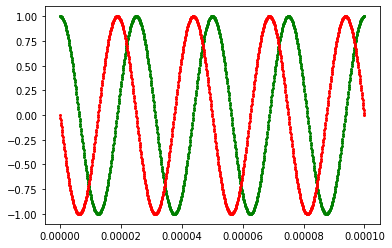

In [4]:
f0 = 40000
import cmath
import scipy.integrate as integr

def e_a(t):
    if t < -0.5 or t > 0.5: 
        return 0 
    else : 
        return complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))

def I_ea(tau):
    def f_real(t):
        a = complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))
        b = complex(np.sin(2*np.pi*f0*(t-tau)), np.cos(2*np.pi*f0*(t-tau))).conjugate()
        return (a*b).real
    def f_imag(t):
        a = complex(np.sin(2*np.pi*f0*t), np.cos(2*np.pi*f0*t))
        b = complex(np.sin(2*np.pi*f0*(t-tau)), np.cos(2*np.pi*f0*(t-tau))).conjugate()
        return (a*b).imag
    return complex(integr.quad(f_real, -0.5, 0.5)[0],integr.quad(f_imag, -0.5, 0.5)[0])


Tau = np.linspace(0, 0.0001, 1000)
Y = np.array([I_ea(tau) for tau in Tau])
plt.scatter(Tau, Y.real, color = 'green', s = 4)
plt.scatter(Tau, Y.imag, color = 'red', s = 4)

plt.show()

#### Méthode 2 : On trace la fonction d'autocorrélation avec la formule suivante, méthode FFT

$$
\mathcal F^{-1} [|X(f)|^2](\tau) = R_x(\tau)
$$

In [5]:
def x(t): 
    if t <= -0.5 or t >= 0.5: 
        return 0 
    else : 
        return np.sin(2*np.pi*f0*t)

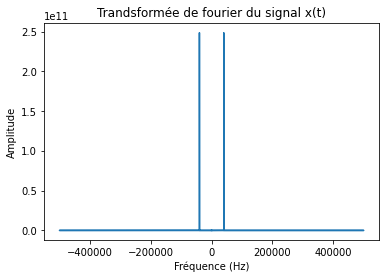

In [6]:
from scipy.signal import find_peaks

X = np.linspace(-0.5, 0.5, 1000000)
Y = [x(t) for t in X]

FFT = abs(np.fft.fft(Y))**2
freq = np.fft.fftfreq(len(X), d=1/1000000)
plt.plot(freq, FFT)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Trandsformée de fourier du signal x(t)')
plt.show()

On observe bien comme prévu deux pics vers 40kHz et -40kHz. Ces pics sont des sinus cardinaux (influence de la fonction porte).

/Users/nicolasplantier/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


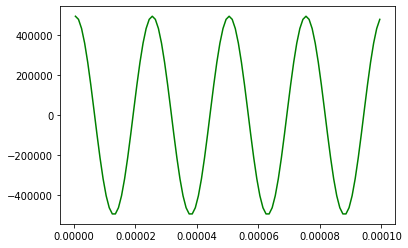

In [7]:
correlation = np.fft.ifft(FFT)
temps = X 
cor_tau = []
cor_valeur = []
i = 0
for t in temps: 
    if t >= 0 and t<=0.0001 : 
        cor_tau.append(t)
        cor_valeur.append(correlation[i])
    i+=1
plt.plot(np.array(cor_tau), np.array(cor_valeur), color = 'green')

On retrouve bien le même graphique que dans le calcul explicite de l'intégrale que nous avons effectué précédemment. 

On va donc définir la fonction qui calcule la fonction d'autocorrélation d'un signal analytique par FFT et celle qui calcule l'intercorrélation entre deux signaux : 

In [32]:
def autocorrelation(temps, valeurs): 
    """
    temps c'est la plage de temps sur laquelle on a des valeurs 
    valeurs c'est les valeurs que prends la fonction dont on veut calculer la fonction d'autocorrélation 

    Cette fonction renvoie donc une fonction sous la forme (temps, valeurs de la fonction d'autocorrélation)
    """
    FFT = abs(np.fft.fft(valeurs))**2
    return(temps, np.fft.ifft(FFT))

def intercorrélation(temps, x_valeurs, y_valeurs): 
    if type(x_valeurs[0]) != float: #cette étape est nécessaire pour convertir un ndarray dont les éléments sont des ndarray vers un ndarray dont les éléments sont des flottants. 
        a = []
        b = []
        for k in range(len(x_valeurs)):
            a.append(x_valeurs[k][0])
            b.append(y_valeurs[k][0])
        x_valeurs = np.array(a)
        y_valeurs = np.array(b)
        x_FFT = np.fft.fft(x_valeurs)
        y_FFT = np.fft.fft(y_valeurs).conjugate()
        produit = x_FFT*y_FFT
    return (temps, np.fft.ifft(produit))

#### Code 1 - Une impulsion non modulèe en fréquence 

Le fichier « signal1.mat » correspond à un enregistrement des signaux analytiques émis et reçus sur une scène réelle.
* Observer l’allure temporelle de ces signaux et vérifier la valeur de la fréquence observée.
* Calculer et tracer la fonction d’intercorrélation.
* Essayer d’identifier le nombre de cibles présentes ainsi que leur distance. Essayer de définir une résolution du système (distance minimale à partir de laquelle on peut voir 2 cibles). Relier cette résolution à la durée de l’impulsion émise T.

## Observer l’allure temporelle de ces signaux et vérifier la valeur de la fréquence observée.

In [9]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

c = 340    # célérité des ondes sonores 
f0 = 40E3  # fréquence porteuse
T = 1E-3   # durée de l'impulsion

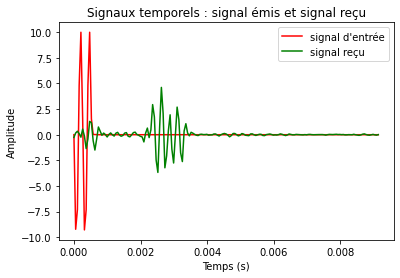

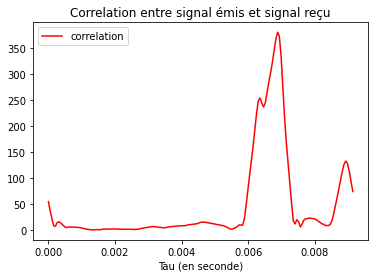

In [52]:
data = scipy.io.loadmat('data/signal1.mat') # chargement du fichier de données

e = data['e'] # e pour entrée 
r = data['r'] # r pour le retour 
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)
temps = d[0]/c

cor_fft = intercorrélation(temps, e,r)           # calcul de la corrélation par FFT
resol_theorique = None                    # résolution théorique

#tracés

#Tracé des signaux (en temporel)
T = d[0]/c
plt.figure()
plt.plot(T, e.real, color = 'red', )
plt.plot(T, r.real, color = 'green')
plt.legend({"signal d'entrée", "signal reçu"})
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Signaux temporels : signal émis et signal reçu')
plt.show()

#Tracé de la correlation 
plt.figure()
plt.plot(cor_fft[0], abs(cor_fft[1]), label = "correlation", color = 'red')
plt.legend()
plt.xlabel('Tau (en seconde)')
plt.title(None)
plt.title('Correlation entre signal émis et signal reçu')
plt.show()


## Calculer et tracer la fonction d’intercorrélation.

Nous allons donc ici calculer : $R_{r,e}(k) = \sum_{n=0}^N r[n] e^*[n-k]$ 

Ainsi, l'instant $k$ correspondra au temps $T[k]$

In [98]:
def inter_correlation(k):
    S = 0 
    e_reel = e.real 
    e_imag = e.imag
    r_reel = r.real 
    r_imag = r.imag
    for n in range(N):
        if (n-k)>= 0: 
            S += (complex(r_reel[n],r_imag[n]))*(complex(e_reel[n-k],-e_imag[n-k]))
    return S

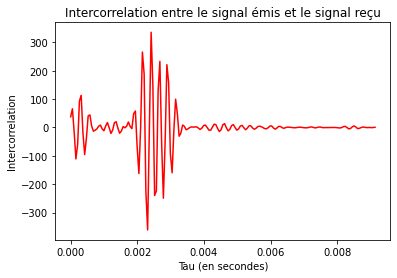

In [108]:
T = d[0]/c
Y = np.array([inter_correlation(k) for k in range(len(T))])
plt.plot(T, Y.real, color = 'red')
plt.xlabel('Tau (en secondes)')
plt.ylabel('Intercorrelation')
plt.title('Intercorrelation entre le signal émis et le signal reçu')
plt.show()

La cellule de code suivante permet de calculer les deux instants ($T_{max,1}$ et $T_{max,2}$) où l'intercorrélation est maximale. 


In [122]:
Tmax1 = 0 
max = 0 
i = 0
while T[i] <= 0.001: 
    if inter_correlation(i).real >= max:
        max = inter_correlation(i).real
        Tmax1 = T[i]
    i +=1

Tmax2 = 0 
max = 0 
j = 0
while T[j] <= 0.004: 
    if inter_correlation(j).real >= max:
        max = inter_correlation(j).real
        Tmax2 = T[j]
    j +=1

print('Tmax1 = ', round(Tmax1,6), 's')
print('Tmax2 = ', Tmax2, 's')

Tmax1 =  0.000315 s
Tmax2 =  0.002415 s


On remarque donc que la fonction d'intercorrélation possède deux pics correspondant donc aux deux cibles en présence. Le signal de la première cible a donc mis le temps $T_{max,1}$ pour faire l'aller retour (départ au niveau du point d'emission, réflexion sur la cible, puis trajet retour). Ainsi, il a mis : 
$$D_{cible,1} = \frac{c \times T_{max,1}}{2} = 5,36 cm$$ 

De même, pour la seconde cible, on a : 

$$D_{cible,2} = \frac{c \times T_{max,2}}{2} = 41,06 cm$$ 

Afin de pouvoir observer deux cibles différentes, il faut donc que les signaux reçus de la réflexion de la cible 1 et celui de la cible 2 soient disjoints. Si pour simplifier, on prend un signal émis en créneau et que le signal reçu a aussi une forme de créneau parfait (mais d'amplitude légèrement inféieure). Si l'on place deux cibles et que les signaux de retour sont disjoints, on aura bien deux pics au niveau de la courbe d'intercorrélation (un creux sépare clairement les deux pics dans la fonction d'intercorrélation). Si au contraire, les deux signaux ne sont pas disjoints, nous verrons alors un unique pic (là où les deux créneaux sont confondus) et nous ne pourrons donc plus distinguer les deux pics correspondants au réflexions sur deux cibles distinctes. 

On en vient donc à la limite suivante : la fin de réception d'un signal ne doit pas s'intersecter avec le début de réception d'un autre. 
Si l'on dit que on émet un signal à l'instant $t=0$ : 
- La fin du signal réfléchit sur la cible 1 arrivera à $t= \frac{2*d_1}{c} + T$. 
- Le début du signal réfléchit sur la cible 1 arrivera à $t = \frac{2*d_2}{c}$

En égalisant ces deux quantités, on trouve donc le pouvoir de résolution : $\Delta d = d_2 - d_1 = \frac{cT}{2}$. On remarque bien que a priori, une période d'impulsion courte permettra une meilleure résolution du système.


$\\[3cm]$

Le pouvoir de résolution du système en utilisant cette forme d’onde basique (impulsion modulée par une fréquence constante) ne permet pas de distinguer 2 objets proches. L’amélioration de la résolution du système passe par la réduction du temps d’impulsion. Malheureusement, cette diminution va à l’encontre de la portée du système qui est proportionnelle à l’énergie émise. La solution classiquement employée pour diminuer la résolution sans sacrifier la portée est d’augmenter la bande du signal émis. Nous allons donc maintenant utiliser une onde modulée linéairement en fréquence, comme représentée sur la figure suivante. La fréquence varie de 38 à 42 KHz (soit une bande $𝐵 = 4$ KHz autours de $f_0$).

<img src="images/rad_fig3.png" width="500">

#### Question 5

Quelles vont être les fréquences observées après échantillonnage à $f_s = 9.5$ KHz ? Si l’on suppose que la transformée de Fourier de $e_a(t)$ est proportionnelle à un rectangle de largeur $𝐵$ centré sur $f_0$ ( $\Pi_B \left(f - f_0)\right)$ ), calculer la largeur de la fonction d’autocorrélation du signal émis. En déduire la résolution théorique du système.

---


#### Code 2 - Une impulsion modulée en fréquence

Le fichier « signal2.mat » correspond à un enregistrement de ces signaux modulés en fréquence sur la même scène que précédemment.
*   Calculer et tracer la fonction d’intercorrélation.
*   Essayer d’identifier le nombre de cibles ainsi que leur distance. Comparer à la résolution théorique calculée au-dessus.


In [129]:
from scipy.signal import find_peaks
B = 4E3 #bande de fréquence

data = scipy.io.loadmat('data/signal2.mat')
e = data['e']
r = data['r']
Fs = data['Fs']
N = len(r)                                # nombre de points du signal
d = c * np.arange(0,N)/Fs/2               # axe distance (metres)

cor_fft = None                            # calcul de la corrélation par FFT
peaks = find_peaks(None)                  # identification des pics de la fonction d'intercorrélation
resol_theorique = None

#tracés
plt.figure(), plt.plot(None)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.title(None)

ValueError: `x` must be a 1-D array

#### On trace d'abord les signaux émis et reçus (rouge = émis, bleu = reçu)

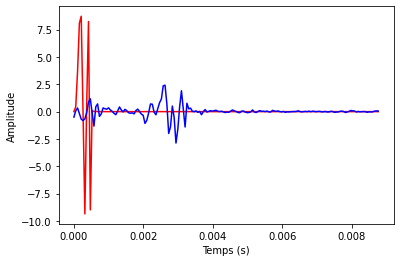

In [131]:
T = d[0]/c
plt.plot(T, e.real, color = 'red', )
plt.plot(T, r.real, color = 'blue', )
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

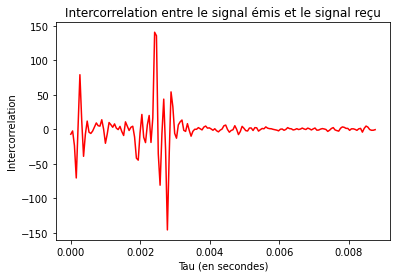

In [127]:
T = d[0]/c
Y = np.array([inter_correlation(k) for k in range(len(T))])
plt.plot(T, Y.real, color = 'red')
plt.xlabel('Tau (en secondes)')
plt.ylabel('Intercorrelation')
plt.title('Intercorrelation entre le signal émis et le signal reçu')
plt.show()

In [132]:
Tmax1 = 0 
max = 0 
i = 0
while T[i] <= 0.001: 
    if inter_correlation(i).real >= max:
        max = inter_correlation(i).real
        Tmax1 = T[i]
    i +=1

Tmax2 = 0 
max = 0 
j = 0
while T[j] <= 0.004: 
    if inter_correlation(j).real >= max:
        max = inter_correlation(j).real
        Tmax2 = T[j]
    j +=1

print('Tmax1 = ', round(Tmax1,6), 's')
print('Tmax2 = ', Tmax2, 's')

Tmax1 =  0.000263 s
Tmax2 =  0.002415 s


## Emission d’un train d’impulsions, cible mobile

### Modélisation des signaux émis et reçus

Nous allons maintenant considérer que les cibles visées peuvent être mobiles. Nous supposerons le vecteur vitesse constant durant le temps de mesure (quelques dixièmes de secondes).

#### Question 6

Montrer que le retard de propagation peut maintenant s’exprimer comme suit $\tau (t) \approx \cfrac{2 d_0}{c} + \cfrac{2 V_r}{c} t $ en fonction de la position initiale $d_0$ de la cible et de sa vitesse radiale $V_r$. Si l’on note $e_a(t) = \beta(t) e^{2 i \pi f_0 t }$, donner l’expression du signal reçu. Montrer que celui-ci peut se
mettre sous la forme suivante : $r_a(t) = \alpha e_a(t - \tau_0) e^{- 2 i \pi f_d t}$ si l’on néglige l’effet de la vitesse sur le terme $\beta(t)$. Donner l’expression de la fréquence Doppler : $f_d$.

---

#### Réponse 6 

Pour le retard de propagation, il faut remarquer que la distance à parcourir pour l'onde sera celle qu'elle avait à partcourir à l'instant $t=0$ ($\frac{2d_0}{c}$) quand l'objet était à la distance $d_0$ plus celle du au fait que l'objet s'est éloigné de la distance $V_r\times t$.

En notant le signal analytique émis : $e_a(t) = \beta(t)e^{2i\pi f_0 t}$, on reprend donc : 
$$
\begin{align}
r_a(t) & = \alpha e_a (t - \tau(t))\\
\newline
r_a(t) & = \alpha \beta(t-\tau(t))e^{2i\pi f_0 (t-\tau(t))} \\
\newline 
r_a(t) & = \alpha \beta(t-\tau_0)e^{2i\pi f_0(t-\tau_0)}e^{-2i\pi \left( f_0 \frac{2V_r}{c}\right)t} \\
\newline 
r_a(t) & = \alpha \beta(t-\tau_0)e^{2i\pi f_0(t-\tau_0)}e^{-2i\pi f_d t}
\end{align}
$$

où on aura donc noté : $f_d =  2f_0 \frac{V_r}{c} $
$\\[2cm]$


### Estimation de la distance et de la vitesse

Le signal émis est maintenant un train de 8 impulsions successives espacées de 𝑇𝑟, comme représenté sur la figure suivante.
<img src="images/rad_fig4.png" width="500">

Pour faciliter l’estimation jointe de la distance et de la vitesse d’une cible, on convertit les vecteurs correspondants aux signaux émis et reçus en matrices où chaque ligne correspond à une récurrence. Ces matrices comporteront donc 8 lignes dans notre cas de figure.
<img src="images/rad_fig5.png" width="500">


#### Question 7

Que se passerait-il si le retard de propagation est supérieur à $T_r$ ? Définir la portée maximale mesurable sans ambiguïté.

---

Le traitement pour estimer la distance se fait, comme précédemment par corrélation, mais sur chaque ligne maintenant.

<img src="images/rad_fig6.png" width="500">


La corrélation étant une opération linéaire, le terme de rotation de phase due à la vitesse de la cible n’est pas modifié. Cette fréquence (rotation de la phase de récurrence à récurrence) qui n’est autre que l’effet Doppler pourra donc être estimé par une transformée de Fourier sur l’axe des récurrences. Celle-ci fera alors apparaitre un pic à la fréquence Doppler correspondante.

#### Question 8 

Par application du théorème de Shannon, déterminer la fréquence maximale observable sans ambigüité. En déduire la vitesse maximale mesurable. Montrer que le produit entre la distance maximale et la vitesse maximale mesurables sans ambigüité ne dépend pas des paramètres de la forme d’onde.

---


#### Code 3 - Train d'impulsions modulées en fréquence

Le fichier « signal3.mat » correspond à un enregistrement de signaux sur une cible mobile. Représenter la cartographie distance/vitesse définie précédemment. En déduire la position et la vitesse de la cible.


In [ ]:
data = scipy.io.loadmat('data/signal3.mat')

e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs                              # Nombre de points par récurrence
e = np.reshape(e,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = np.reshape(r,(int(Nbrec),int(N))).T  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

d = c * np.arange(0,N)/Fs/2                   # axe distance (metres)
fd = np.arange(0,Nbrec)/float(Nbrec)/Tr              # axe fréquence Doppler (Hz)
v = fd*c/2/f0*100                               # conversion des fréquences Doppler en vitesses (cm/s)

cor = None             # calcul de la corrélation par FFT
cor_dop = None         # calcul de la FFT Doppler
d_cible = None
v_cible = None         #calcul du maximum de corrélation (estimation de la distance et de la vitesse)

#tracés
plt.figure(),
plt.imshow(None)
plt.xlabel(None)
plt.ylabel(None)
title(None)

Dans notre application, la vitesse de l’objet cible ne nous intéresse pas directement. Par contre, la scène vue par le radar peut comporter d’autres échos possédant une vitesse nulle (on appelle ces échos indésirables le clutter). On peut alors exploiter l’information de Doppler pour éliminer les cibles possédant un Doppler nul. On appelle ce type de filtre, un filtre MTI (Moving Target Indicator).

> ##### Filtrage
>Un filtre $R$ est un système linéaire invariant temporellement. Il est ainsi caractérisé par sa réponse impulsionnelle, $h[n] = R[\delta[n]]$. La sortie temporelle $y[n]$ sera alors le produit de convolution de cette réponse impulsionnelle et de l’entrée $x[n]$:
>
> $$ y[n] = \sum_{k = -\infty}^{+\infty} x[k] h[n-k] = x * h = h * x = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] $$
>
> Par transformée en Z, on sait que ce produit de convolution se transforme en produit simple :
>
> $$ Y(Z) = H(Z) X(Z) $$ 
>
> On peut alors également caractériser le filtre par sa fonction de transfert : $H(Z) = TZ[h[n]]$\\
qui peut être calculée simplement par $H(Z) = \cfrac{Y(z)}{X(Z)}$
> Dans le cas particulier où $x[n] = e^{2 i \pi \tilde{f}n}$ la sortie temporelle s’écrit :
>
>$$ y[n] = \sum_{k = -\infty}^{+\infty} h[k] x[n-k] = e^{2 i \pi \tilde{f}n} \sum_{k = -\infty}^{+\infty} h[k] e^{-2 i \pi \tilde{f}k} = x[n] H(e^{2 i \pi \tilde f})$$
>Autrement dit, une exponentielle complexe est simplement multipliée par un nombre complexe à la traversée d’un système linéaire (c’est une fonction propre). Ce nombre complexe, n’est autre que la fonction de transfert où l’on a limité $Z$ au cercle unité. $Z(= e^{2 i \pi \tilde f})$.Ainsi, la représentation de $H(e^{2 i \pi \tilde f})$ en fonction des fréquences permet d’analyser le gain (module) et le déphasage (argument) subis par les composantes fréquentielles non amorties. C’est le diagramme de Bode.


Le filtre MTI le plus simple est $H_2(Z) = \cfrac{1 - z^{-1}}{2}$. On utilise classiquement ce type de filtre en
cascade dans les systèmes réels : $H_M(Z) = \left(\cfrac{1 - z^{-1}}{2}\right)^{M-1}$.

#### Question 9

 Tracer le comportement fréquentiel du module et de la phase de $H_2(Z)$. Généraliser à $H_M(Z)$. Calculer la fréquence de coupure de ce filtre. En déduire la vitesse « de coupure » correspondante.

---


#### Question 10

Etudier et tracer le comportement fréquentiel de $G_M(Z) = \cfrac{\sum_{k=0}^{M-1}z^{-k}}{M}$. Montrer que le
changement de variable $Z \to -Z$ permet de passer à filtre passe-haut ($G_M(Z) = G_M(-Z)$). En déduire la fréquence de coupure de ce dernier filtre.

---


Pour finir, on s’intéresse à une autre classe de filtres MTI : $T_M(Z) = 1 - \cfrac{\sum_{k = 0}^{M-1}z^{-k}}{M}= 1 - G_M(Z)$. 

####Code 4 - Tracé des gains des filtres MTI
Comparer les filtres MTI précédents à partir des tracés de leurs réponses fréquentielles.


In [ ]:
Npts=100 # Nombre de points des tracés
M=8      #Taille des réponses impulsionnelles

h2 = None # Réponse impulsionnelle du filtre H2
h8 = None # Réponse impulsionnelle du filtre H8
g2 = None # Réponse impulsionnelle du filtre G2
g8 = None # Réponse impulsionnelle du filtre G8
t2 = None # Réponse impulsionnelle du filtre T2
t8 = None # Réponse impulsionnelle du filtre T8

from scipy import signal 
w,h2 = signal.freqz(h2,1,Npts) # Calcul de la fonction de transfert associée
w,h8 = None
w,g8 = None
w,t8 = None

vrad = c/(4*np.pi*f0*Tr)*w*100 # Conversion pulsation réduite en vitesse radiale

plt.figure(),plt.plot(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(None)

####Code 5 - Test des filtres MTI sur signaux réels
Comparer les 4 filtres précédents (M=2 et M=8) en les appliquant aux signaux du fichier « signal4.mat ». Lequel est le mieux adapté à la détection de la cible ?


In [ ]:
data = scipy.io.loadmat('data/signal4.mat') # chargement du fichier de donnÈes
e = data['e']
r = data['r']
Fs = data['Fs']
Nbrec = data['Nbrec']
Tr = data['Tr']

N = Tr * Fs             # Nombre de points par récurrence
e = e.reshape(N, Nbrec) # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec
r = r.reshape(N,Nbrec)  # Conversion du vecteur de Nbrec récurrences en une matrice N x Nbrec

cor = None              # calcul de la corrélation par FFT
cor_dop = None          # calcul de la FFT Doppler

cor_h2 = None
cor_h8 = None
cor_g8 = None
cor_t8 = None

plt.figure(),
plt.subplot(2, 1, 1), plt.imshow()
plt.xlabel(None)
ylabel(None)
title('carto distance/vitesse')

plt.subplot(2,1,2),plt.plot(None)
plt.legend('sans filtre MTI','H2','H8','G8','T8')